In [6]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly
!pip install seaborn
!pip install geopy
!pip install folium
!pip install wordcloud


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from wordcloud import WordCloud
import folium 

import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
print(f"Data has {df.shape[0]} rows.")
print(f"Data has {df.shape[1]} columns. ")
df.dtypes

Data has 51717 rows.
Data has 17 columns. 


url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

Columns Description

url - contains the url of the restaurant in the zomato website
address - contains the address of the restaurant in Bengaluru
name - contains the name of the restaurant
online_order - whether online ordering is available in the restaurant or not
book_table - table book option available or not
rate contains - the overall rating of the restaurant out of 5
votes - contains total number of rating for the restaurant as of the above mentioned date
phone - contains the phone number of the restaurant
location - contains the neighborhood in which the restaurant is located
rest_type - restaurant type
dish_liked - dishes people liked in the restaurant
cuisines - food styles, separated by comma
approx_cost(for two people) - contains the approximate cost for meal for two people
reviews_list - list of tuples containing reviews for the restaurant, each tuple
menu_item - contains list of menus available in the restaurant
listed_in(type) - type of meal
listed_in(city) - contains the neighborhood in which the restaurant is listed

In [10]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Checking for duplicated values

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### Renaming some column names

In [13]:
df = df.rename(columns={
    'approx_cost(for two people)':'cost',
    'listed_in(type)':'type',
    'listed_in(city)':'city'
})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

### Replacing NaN values in rate feature

In [14]:
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-']

In [15]:
df['rate'] = df['rate'].apply(lambda x: str(x).replace('/5', ''))

In [16]:
df['rate'] = df['rate'].replace('nan', np.nan)

In [17]:
df['rate'] = df['rate'].astype('float')

In [18]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

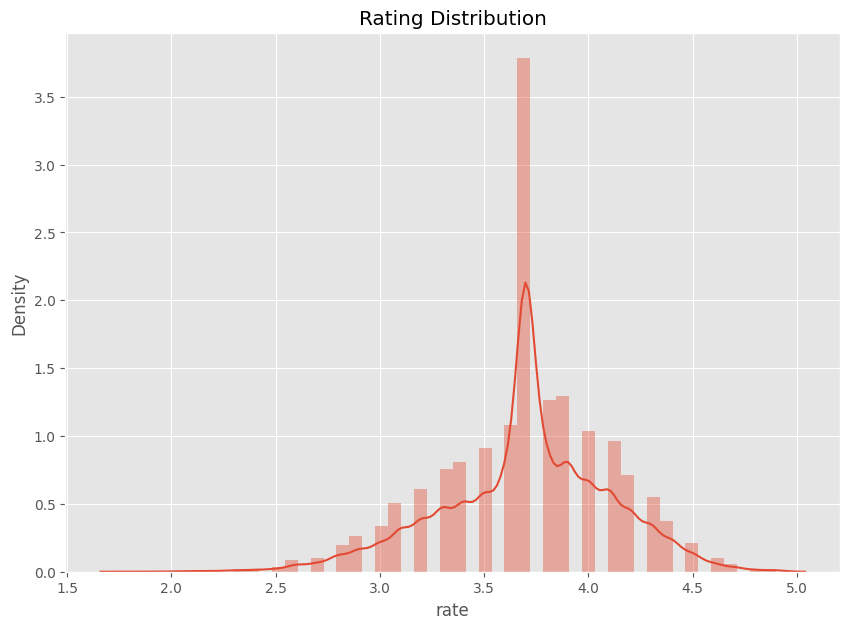

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(df['rate'])
plt.title('Rating Distribution')
plt.show()

Replacing NaN values for cost

In [20]:
df['cost'] = df['cost'].apply(lambda x: str(x).replace(',', ''))

In [21]:
df['cost'] = df['cost'].astype(float)

In [22]:
df['cost'] = df['cost'].fillna(df['cost'].mean())
df['cost'].isna().sum()

0

In [23]:
df['cost'] = np.log(df['cost'])

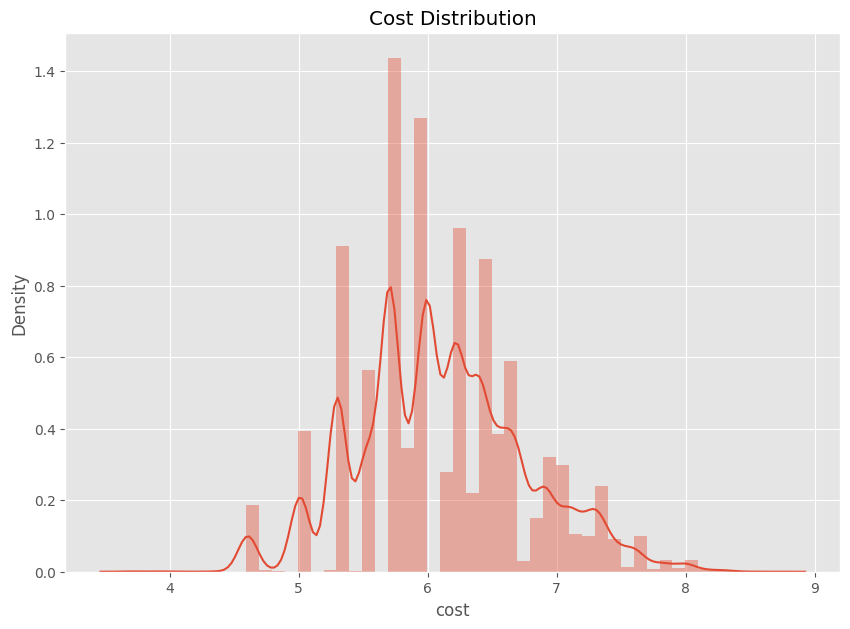

In [24]:
plt.figure(figsize=(10,7))
sns.distplot(df['cost'])
plt.title('Cost Distribution')
plt.show()

The cost feature also follows nearly normal distribution

### Exploratory data analysis (EDA)

Which are the top restaurant chains in bengaluru

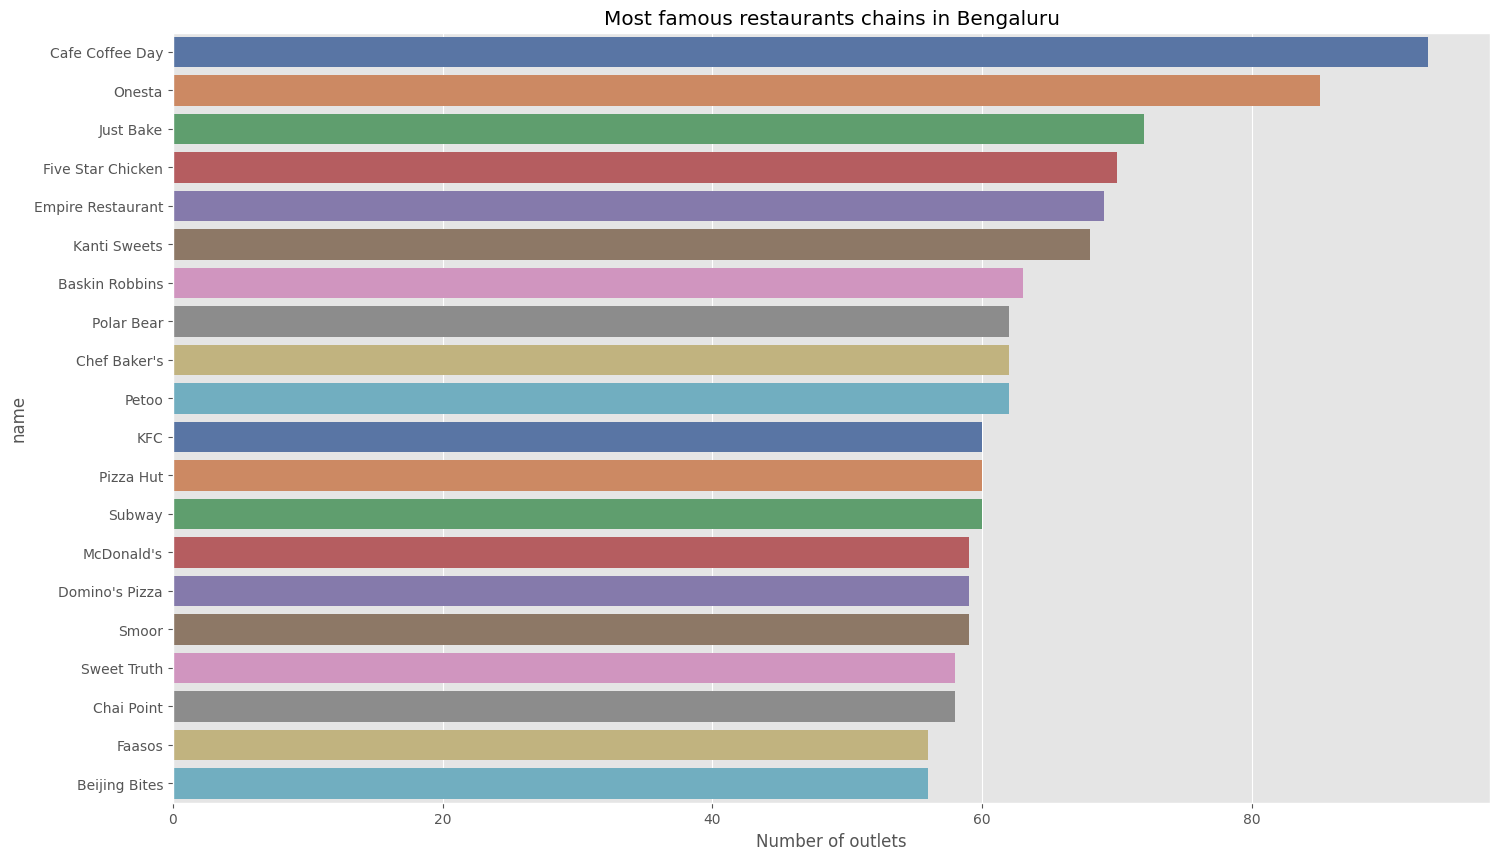

In [25]:
plt.figure(figsize=(17, 10))
top_chains = df['name'].value_counts()[:20]
sns.barplot(x=top_chains, y=top_chains.index, palette='deep')
plt.title('Most famous restaurants chains in Bengaluru')
plt.xlabel('Number of outlets')
plt.show()

Observation

Onesta and Empire Restaurant has the most number of outlets in and around bangalore.

### Which is the most common Restaurant type in Banglore

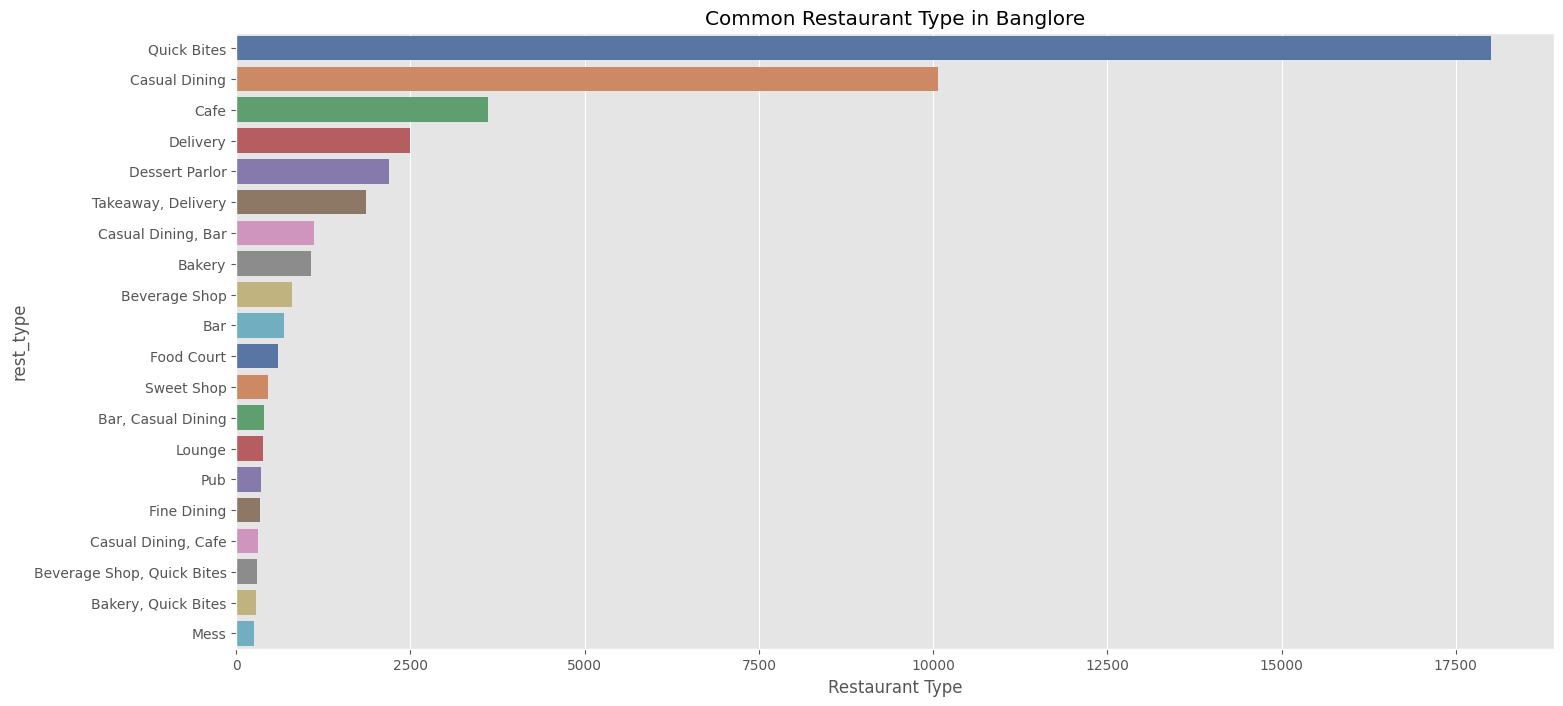

In [26]:
plt.figure(figsize=(17, 8))
rest_type = df['rest_type'].value_counts()[:20]
sns.barplot(x=rest_type, y=rest_type.index, palette='deep')
plt.title('Common Restaurant Type in Banglore')
plt.xlabel('Restaurant Type')
plt.show()

Observation

Casual Dining and Quick Bites type restaurant dominate

### What is the ratio between restaurants that provide and do not provide table booking

In [27]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df is your DataFrame containing the Zomato dataset
x = df['book_table'].value_counts()

colors = ['gold', 'skyblue']
trace = go.Pie(labels=x.index, 
               values=x, 
               hoverinfo='label+percent',
               textinfo='value',
               marker=dict(colors=colors, line=dict(color='#001000', width=2))
               )
layout = go.Layout(title="Table booking", width=500, height=500)
fig = go.Figure(data=[trace], layout=layout)

# Save the plot as an HTML file
py.plot(fig, filename='pie_chart_table_booking.html')


'pie_chart_table_booking.html'

Observation

Most of the Restaurants do not offer table booking

In [28]:
pip install --upgrade nbformat


In [29]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df is your DataFrame containing the Zomato dataset
trace0 = go.Box(y=df['cost'], name='Approx. Cost',
                marker=dict(
                    color='rgb(214, 12, 140)'
                ))
data = [trace0]
layout = go.Layout(title='Box Plot of Approximate Cost', width=800, height=500, yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)

# Save the plot as an HTML file
py.plot(fig, filename='box_plot_approximate_cost.html')


'box_plot_approximate_cost.html'

Observation

<!-- As clearly indicated, almost 70% of restaurants in Bangalore accepts the online orders and delivery. -->

Observation

As clearly indicated, almost 70% of restaurants in Bangalore accepts the online orders and delivery.

###  Rating Distributions

In [30]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [31]:
df.rate.value_counts().index

Index([3.700448817952718,               3.9,               3.8,
                     3.7,               3.6,               4.0,
                     4.1,               3.5,               3.4,
                     3.3,               4.2,               3.2,
                     4.3,               3.1,               4.4,
                     3.0,               2.9,               4.5,
                     2.8,               2.7,               4.6,
                     2.6,               4.7,               2.5,
                     2.4,               4.8,               4.9,
                     2.3,               2.2,               2.1,
                     2.0,               1.8],
      dtype='float64', name='rate')

<Axes: xlabel='rate', ylabel='Density'>

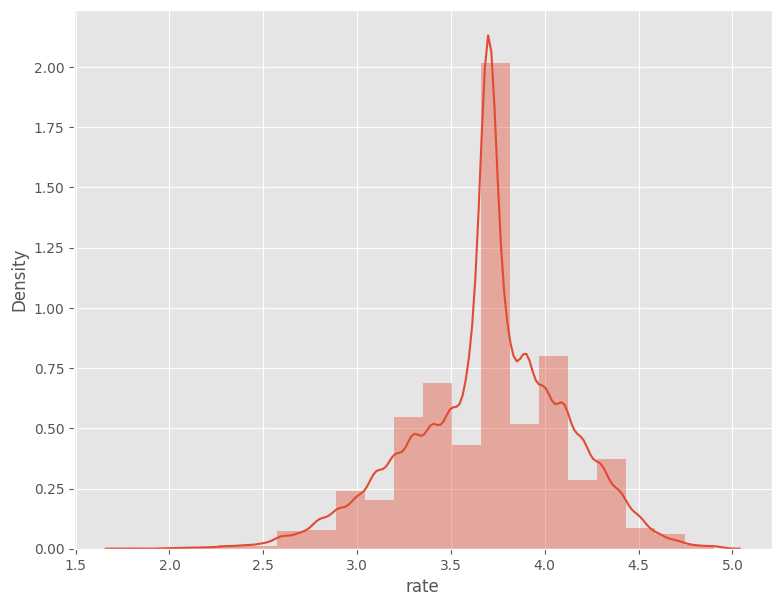

In [32]:
plt.figure(figsize=(9, 7))
sns.distplot(df['rate'], bins=20)

Observation

Most of the value lie between 3.0 and 4.5

### Cost Vs Rating

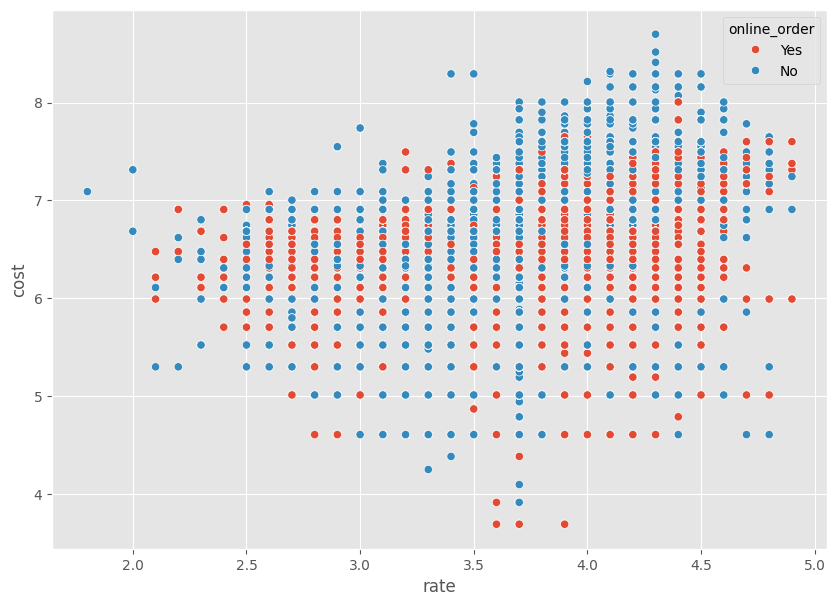

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='rate', y='cost', hue='online_order', data=df)
plt.show()

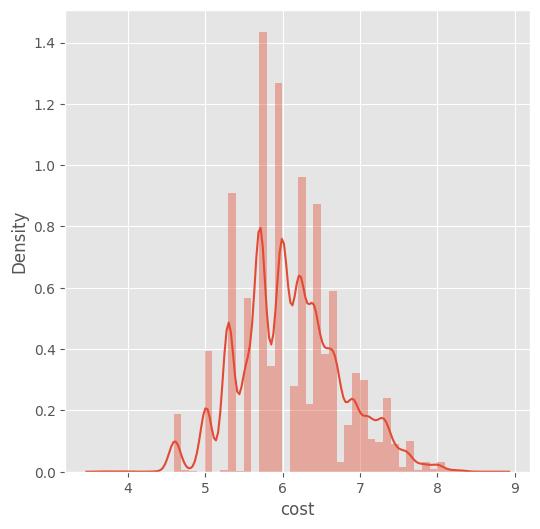

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(df['cost'])
plt.show()

Is there any difference b/w votes of restaurants accepting and not accepting online orders

In [35]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df is your DataFrame containing the Zomato dataset
yes_votes = df[df['online_order'] == 'Yes']['votes']
trace0 = go.Box(y=yes_votes, name='Accepting Online Orders',
                marker=dict(
                    color='rgb(214, 12, 140)',
                ))
no_votes = df[df['online_order'] == 'No']['votes']
trace1 = go.Box(y=no_votes, name='Not Accepting Online Orders',
                marker=dict(
                    color='rgb(0, 128, 128)',
                ))
layout = go.Layout(
    title='Box Plots of Votes', width=800, height=500
)
data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)

# Save the plot as an HTML file
py.plot(fig, filename='box_plot_votes.html')


'box_plot_votes.html'

Observation

The median number of votes for both categories vary.
Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping after each order through zomato application.

### cost factor 

In [36]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df is your DataFrame containing the Zomato dataset
trace0 = go.Box(y=df['cost'], name='Approx. Cost',
                marker=dict(
                    color='rgb(214, 12, 140)'
                ))
data = [trace0]
layout = go.Layout(title='Box Plot of Approximate Cost', width=800, height=500, yaxis=dict(title='Price'))
fig = go.Figure(data=data, layout=layout)

# Save the plot as an HTML file
py.plot(fig, filename='box_plot_approximate_cost.html')


'box_plot_approximate_cost.html'

Observation

The median approximate cost for two people is 6k for a single meal.
50% percent of restaurants charge between 5.5k and 6.7k for s single meal for two people.

### Finding Best Budget Restaurants in any location

In [37]:
def find_budget_rest(location, rest):
    """
    pass location and restaurant type as parameters, functin will return name of restaurants.
    """
    budget = df[(df['cost'] <= 600) & (df['location'] == location) & (df['rate'] > 4) & (df['rest_type'] == rest)]
    return budget['name'].unique()

In [38]:
find_budget_rest('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Midnight Mania', 'Litti Twist',
       'The Shawarma Shop', 'Gorbandh', 'Yum In My Tum', 'Chaatimes',
       "Muthashy's", 'Swad Punjab Da', 'Hungry Lee', "Domino's Pizza",
       'Roti Wala', 'Mojo Pizza - 2X Toppings', 'Andhra Kitchen'],
      dtype=object)

Which are the foodie areas ?

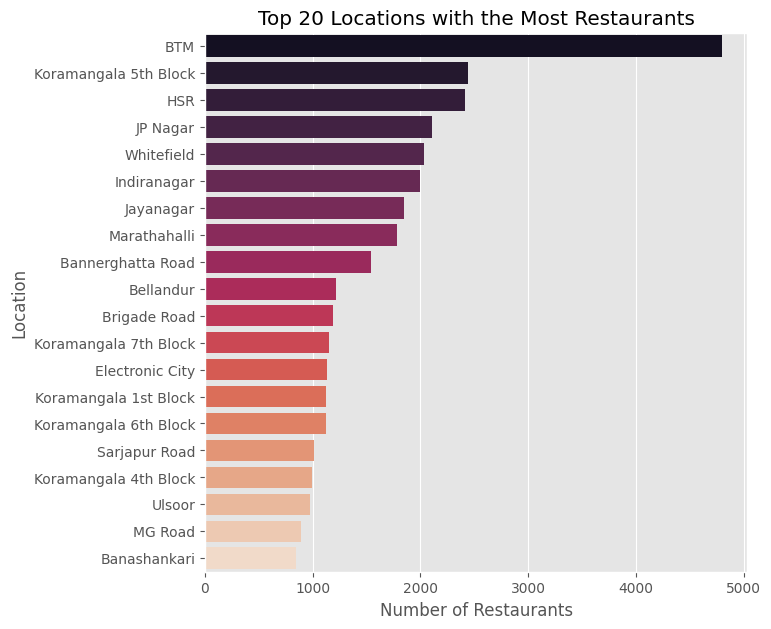

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
locations = df['location'].value_counts()[:20]
sns.barplot(x=locations.values, y=locations.index, palette='rocket')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.title('Top 20 Locations with the Most Restaurants')
plt.show()


Observation

We can see that Kramangla 5th Block, HSR and BTM has the most number of restaurants.
Koramangla 5th block dominates the section by having more than 4500 restaurant

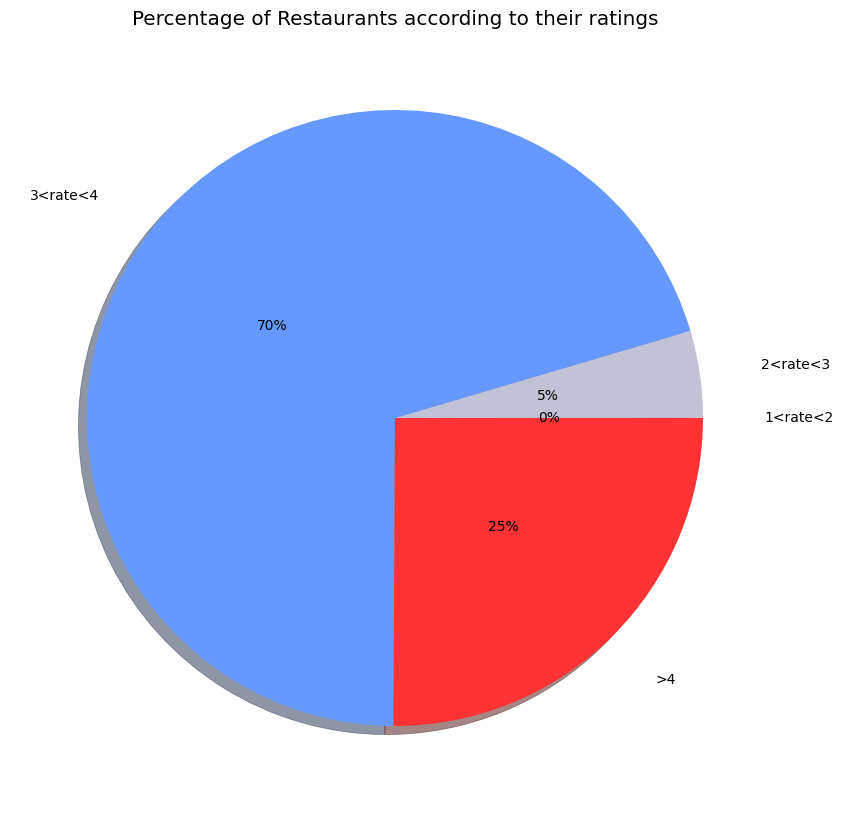

In [40]:
# plot ratings as between "1 and 2", "2 and 3", "3 and 4" and "4 and 5"
df['rate'] = df['rate'].astype(float)
slices = [((df['rate'] >= 1) & (df['rate'] < 2)).sum(),
           ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

Which are the most common cuisines in each location ?

In [41]:
new_df = df.groupby(['location', 'cuisines']).agg('count')
new_df.sort_values(['url'], ascending=False).groupby(['location'], as_index=False).apply(lambda x : x.sort_values(by='url', ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

,level_0,location,cuisines,count
0,0,BTM,"North Indian, Chinese",373
1,0,BTM,North Indian,319
2,0,BTM,Biryani,114
3,1,Banashankari,South Indian,81
4,1,Banashankari,"North Indian, Chinese",61
...,...,...,...,...
266,91,Yelahanka,"South Indian, Biryani",2
267,91,Yelahanka,Fast Food,1
268,92,Yeshwantpur,"North Indian, Chinese",16
269,92,Yeshwantpur,"South Indian, North Indian, Chinese",7


Extracting location Information using Geopy

In [42]:
locations = pd.DataFrame({"Name":df['location'].unique()})
locations['Name'] = locations['Name'].apply(lambda x: "Bangalore "+str(x))
locations.head()
lat_lon = []
geolocator = Nominatim(user_agent='app')
for location in locations['Name']:
    loc = geolocator.geocode(location)
    if loc is None:
        lat_lon.append(np.nan)
    else:
        geo = (loc.latitude, loc.longitude)
        lat_lon.append(geo)

locations['geo_loc'] = lat_lon
locations.to_csv('locations.csv', index=False)

In [43]:
locations['Name'] = locations['Name'].apply(lambda x:x.replace("Bangalore", '')[1:])
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9309217, 77.5559127)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.7968386, 77.3876522)"
3,Jayanagar,"(12.9292731, 77.5824229)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"


We have found out latitude and longtitude of each location in listed in the dataset using geopy.

### Heatmap of restaurant count on each location

In [44]:
rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
rest_locations.columns=['Name', 'count']
rest_locations = rest_locations.merge(locations, on='Name', how='left').dropna()
rest_locations['count'].max()

4793

In [45]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [46]:
lat, lon = zip(*np.array(rest_locations['geo_loc']))
rest_locations['lat'] = lat
rest_locations['lon'] = lon
basemap = generateBaseMap()
HeatMap(rest_locations[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)

In [47]:
basemap

Observation

It is clear that restaurants tend to concentrate in centraol bangalore area.
The clutter of restaurants lowers as we move away fron central.
So, potential restaurant entrepreneurs can refer this and find out good location for their ventur.

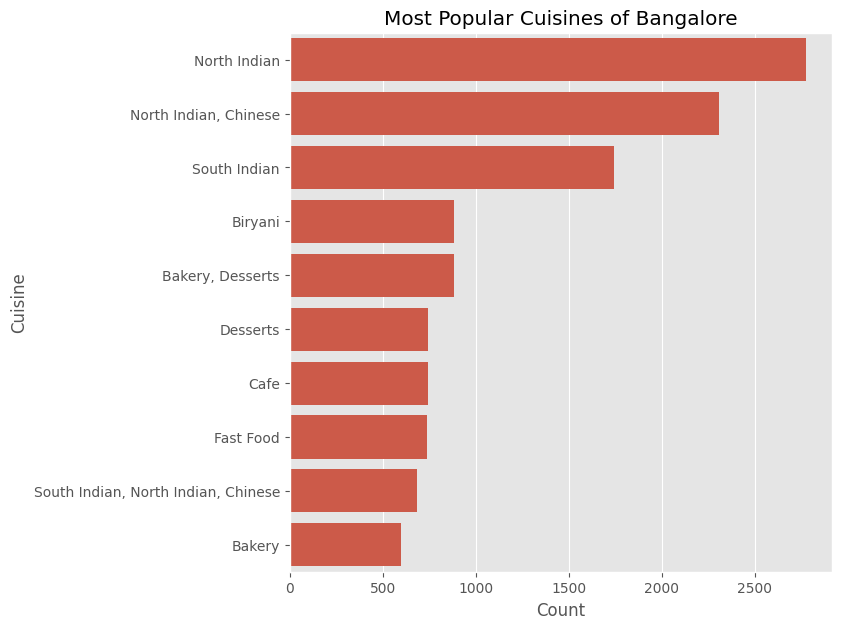

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines.values, y=cuisines.index)
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Most Popular Cuisines of Bangalore')
plt.show()


Observation

The North Indian, chinese, South Indian and Briyani are most common.
Is this imply the fact that Bangalore is more influenced by North Indian Culture more than South?

### Heatmap of North Indian Restaurants

In [49]:
def produce_data(col, name):
    data = pd.DataFrame(df[df[col] == name].groupby(['location'], as_index=False)['url'].agg('count'))
    data.columns=['Name', 'count']
    print(data.head())
    data = data.merge(locations, on='Name', how='left').dropna()
    data['lat'], data['lon'] = zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'], axis=1)

In [50]:
north_india = produce_data('cuisines', 'North Indian')

                Name  count
0                BTM    319
1       Banashankari     28
2          Banaswadi     12
3  Bannerghatta Road     72
4       Basavanagudi     20


In [51]:
basemap=generateBaseMap()
HeatMap(north_india[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

Observation

Interesting to see a cluster of North Indian Restaurants in South Bangalore area!
This may indicate that these areas are more populated by North Indians.

In [52]:
south_india = produce_data('cuisines', 'South Indian')
# south_india.columns
basemap = generateBaseMap()
HeatMap(south_india[['lat', 'lon', 'count']].values.tolist(), zoom=20, radius=15).add_to(basemap)
basemap

                Name  count
0                BTM    106
1       Banashankari     81
2          Banaswadi     37
3  Bannerghatta Road     44
4       Basavanagudi     87


Observation

They tens to span all over Bangalore.
South Indian cuisines tend to cluster near central Bangalore.

### Analysing Restaurant Chains

In [53]:
def produce_chains(name):
    data_chain = pd.DataFrame(df[df['name'] == name]['location'].value_counts().reset_index())
    data_chain.columns = ['Name', 'count'] 
    data_chain = data_chain.merge(locations, on='Name', how='left').dropna()
    data_chain['lan'], data_chain['lon'] = zip(*data_chain['geo_loc'].values)
    return data_chain[['Name', 'count', 'lan', 'lon']]

In [54]:
new_df = df.groupby(['rest_type', 'name']).agg('count')
datas = new_df.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x:x.sort_values(by='url', ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [55]:
new_df = df.groupby(['rest_type', 'name']).agg('count')
datas = new_df.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x:x.sort_values(by='url', ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

Which are the most populat casual dining restaurant chains ?

In [56]:
casual = datas[datas['rest_type'] == 'Casual Dining']
casual

,level_0,rest_type,name,count
59,27,Casual Dining,Empire Restaurant,58
60,27,Casual Dining,Mani's Dum Biryani,47
61,27,Casual Dining,Chung Wah,46


Observation

We can see the Empire Restaurant, Chung Wah and Mani's Dum Briyani are the most populat casual dining restaurant chains in Bangalore



Where are their outlets located ?

In [57]:
mapbox_access_token="pk.eyJ1IjoiYWRpdHlha3VtYXIzMTIiLCJhIjoiY2x3OW9udHBiMDZtazJpcHA3bGFxZGYyayJ9.YnRHa11Yr5H8bRn1YCcMaw"

In [58]:
def produce_trace(data_chain, name):
    data_chain['text'] = data_chain['Name']+'<br>'+data_chain['count'].astype(str)
    trace = go.Scattermapbox(
        lat = data_chain['lan'],
        lon = data_chain['lon'],
        mode='markers',
        marker = go.scattermapbox.Marker(
            size = data_chain['count']*4
        ),
        text=data_chain['text'],
        name = name
    )
    return trace

In [59]:
data = []
for row in casual['name']:
    data_chain = produce_chains(row)
    trace_0 = produce_trace(data_chain, row)
    data.append(trace_0)
    
layout = go.Layout(title='Casual Dining Restaurant chains locations around Bangalore',
                   autosize=True,
                   hovermode='closest',
                   mapbox=dict(
                       accesstoken=mapbox_access_token,
                       bearing=0, style='streets',
                       center = dict(
                           lat=12.96,
                           lon=77.59
                       ),
                       pitch=0,
                       zoom=10
                   ))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

In [60]:
cafe = datas[datas['rest_type'] == 'Cafe']
cafe

,level_0,rest_type,name,count
41,19,Cafe,Cafe Coffee Day,93
42,19,Cafe,Smally's Resto Cafe,54
43,19,Cafe,Mudpipe Cafe,39


Observation

No surprise, Cafe coffee day restaurant dominated way over other cafe chains in Bangalore.
Cafe coffee day has 93 outlets in Bangalore.
Cafe coffee Day was started as a retail restaurant in 1996. The first CCD outlet was setup on July 11, 1996 at Brigade Road, Bengaluru, Karnataka.

Where are their outlets located ?

In [61]:
data = []
for row in cafe['name']:
    data_chain = produce_chains(row)
    trace0 = produce_trace(data_chain, row)
    data.append(trace0)
    
layout = go.Layout(title='Cafe Restaurant chains locations around Bangalore',
                   autosize=True,
                   hovermode='closest',
                   mapbox=dict(
                       accesstoken = mapbox_access_token,
                       bearing = 0, style='streets',
                       center = dict(
                           lat = 12.96,
                           lon = 77.59
                       ),
                       pitch=0,
                       zoom=10
                   ))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

## Feature Engineering

Converting the categorical columns into integer

In [62]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)

In [63]:
df['book_table'] = pd.get_dummies(df['book_table'], drop_first=True)

One Hot Encoding on location | Rest_type feature

In [64]:
location_dummies = pd.get_dummies(df['location'])
rest_type_dummies = pd.get_dummies(df['rest_type'])
type_dummies = pd.get_dummies(df['type'])

In [65]:
final_df = pd.concat([df, location_dummies, rest_type_dummies, type_dummies], axis=1)
final_df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,False,False,False,True,False,False,False,False,False,False


Drop the extra columns

In [67]:
final_df = final_df.drop(['url','address', 'name', 'rest_type', 'location', 'cuisines', 'dish_liked', 'reviews_list', 'menu_item','phone', 'city', 'type'], axis=1)
final_df.head(1)

,online_order,book_table,rate,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,True,True,4.1,775,6.684612,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


Check Features Correlation

In [69]:
df.dtypes

url              object
address          object
name             object
online_order       bool
book_table         bool
rate            float64
votes             int64
phone            object
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

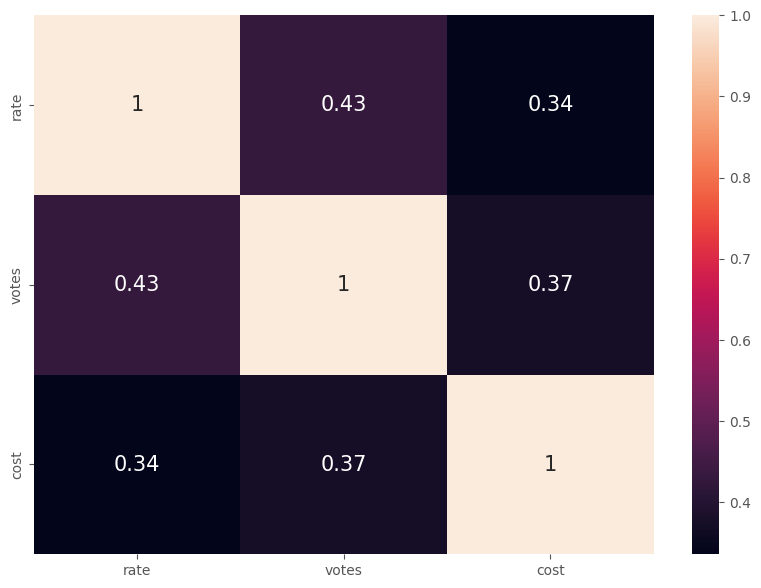

In [74]:
# Remove non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check for missing values and handle them if necessary
# For example, you can fill missing values with the column mean
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Plot the correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, annot_kws={"size": 15})
plt.show()


Feature Selection

In [75]:
final_df.to_csv('zomato_PPD.csv', index=False)

In [77]:
#  Splitting the features into independent and dependent variables

X = final_df.drop(['rate'], axis=1)
X.head()

,online_order,book_table,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,True,True,775,6.684612,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,787,6.684612,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,918,6.684612,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,88,5.703782,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,166,6.396930,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [78]:
y = final_df['rate']

In [79]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

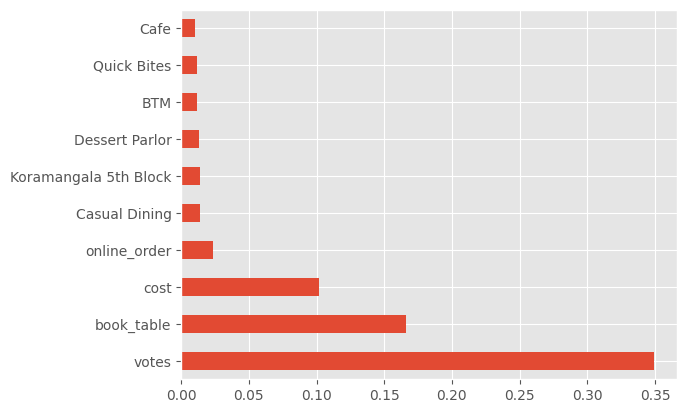

In [80]:
# Plotting graph of feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

Model Building

In [82]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5)

Applying Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='absolute_error')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [91]:
dtree_pred = dtree.predict(X_test)

In [92]:
X_train.head()

,online_order,book_table,votes,cost,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,...,"Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery",Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
36156,False,False,0,5.703782,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4056,True,False,4,5.703782,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
33644,True,False,511,6.214608,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
41785,True,False,40,6.214608,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25859,True,False,0,5.010635,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [93]:
r2 = metrics.r2_score(y_test, dtree_pred)
print('R-Square Score: ', r2*100)

# Calculate the absolute errors (MAE)
dtree_error = abs(dtree_pred - y_test)
print("Mean Absolute Error: ", round(np.mean(dtree_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_error / y_test)

# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
print('Accuracy for Decision tree regressor is: ', round(dtree_accuracy, 2), '%')

R-Square Score:  84.14665249073336
Mean Absolute Error:  3.7 degrees.
Accuracy for Decision tree regressor is:  98.62 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


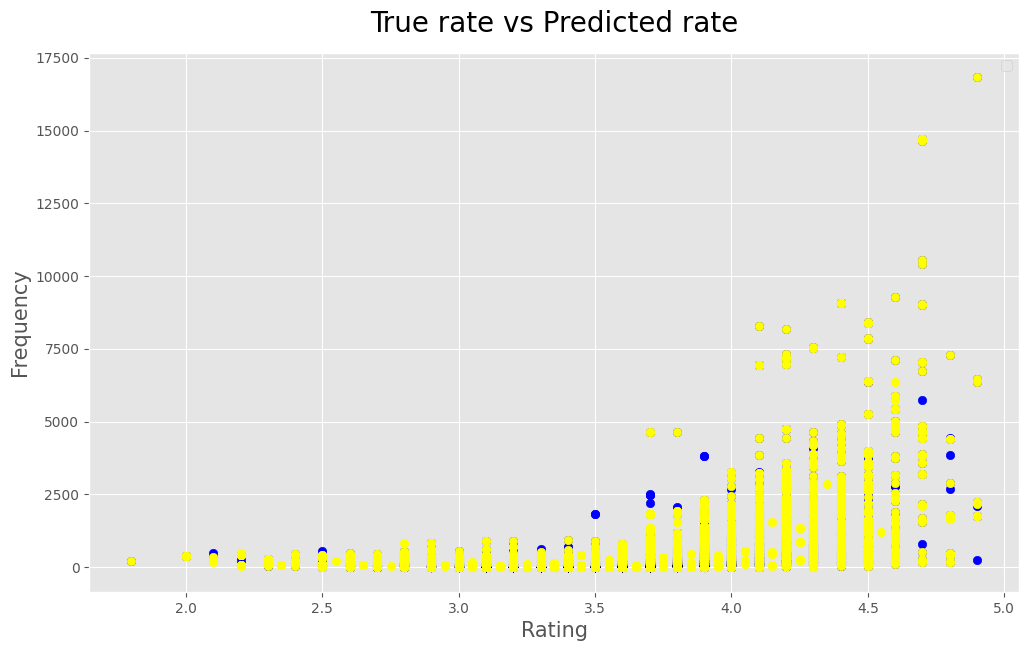

In [94]:
plt.figure(figsize=(12, 7))
plt.scatter(y_test, X_test.iloc[:,2], color='blue')
plt.title('True rate vs Predicted rate', size=20, pad=15)
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
plt.scatter(dtree_pred, X_test.iloc[:,2], color='yellow')
plt.legend()
plt.show()

Model Deployment

In [95]:
import pickle

In [96]:
with open('Decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtree, f)